In [ ]:
関数型APIの紹介
テンソルを直接操作するのがこのAPI

sequenceの例と共に紹介

In [ ]:
from keras import Input, layers
input_tensor = Input(shape=(32,))
dense = layers.Dense(32, activation='relu')
output_tensor = dense(input_tensor)

In [ ]:
from keras.models import Sequential, Model
from keras import layers
from keras import Input

seq_model = Sequential()
seq_model.add(layers.Dense(32,activation='relu',input_shape=(64,)))
seq_model.add(layers.Dense(32,activation='relu'))
seq_model.add(layers.Dense(10,activation='softmax'))
seq_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#func APIだと

input_tensor = Input(shape=(64,))
x = layers.Dense(32,activation='relu')(input_tensor)
x = layers.Dense(32,activation='relu')(x)
output_tensor = layers.Dense(10,activation='softmax')(x)
#入力と出力を定義すると自動で間をつないでくれる
#あとは勝手にインスタンス化してくれる
#間がつながってないとruntime error
model = Model(input_tensor, output_tensor)
model.summary()



Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy')

In [ ]:
import numpy as np

x_train = np.random.random((1000,64))
y_train = np.random.random((1000,10))

In [ ]:
model.fit(x_train,y_train,epochs=10,batch_size=128)
score = model.evaluate(x_train,y_train)

Epoch 1/10
8/8 [==============================] - 0s 3ms/step - loss: 12.0398
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 12.8547
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: 14.4534
Epoch 4/10
8/8 [==============================] - 0s 2ms/step - loss: 16.3052
Epoch 5/10
8/8 [==============================] - 0s 2ms/step - loss: 17.6272
Epoch 6/10
8/8 [==============================] - 0s 1ms/step - loss: 18.5347
Epoch 7/10
8/8 [==============================] - 0s 2ms/step - loss: 19.1504
Epoch 8/10
8/8 [==============================] - 0s 2ms/step - loss: 20.2312
Epoch 9/10
8/8 [==============================] - 0s 2ms/step - loss: 21.8456
Epoch 10/10
32/32 [==============================] - 0s 939us/step - loss: 24.8551


In [ ]:
多入力な入力をもとにモデルを作る場合

どちらの入力も特徴量化、NN変換した後に、分別器にかけて学習、
その損失を元に分別器に即した特徴量化やNN変換のパラメタを変えていく方法

In [ ]:
from keras.models import Model
from keras import layers
from keras import Input

text_vocablary_size = 10000
question_vocabulary_size = 10000
answer_vocabulary_size = 500

text_input = Input(shape=(None,), dtype='int32',name='text')
#入力サイズ64のベクトルシーケンスへ埋め込む
embedded_text = layers.Embedding(text_vocablary_size,64)(text_input)
encoded_text = layers.LSTM(32)(embedded_text)

question_input = Input(shape=(None,), dtype='int32',name='question')
embedded_question = layers.Embedding(question_vocabulary_size,32)(question_input)
encoded_question = layers.LSTM(16)(embedded_question)

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
max_len = 500  # cut texts after this number of words (among top max_features most common words)

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [ ]:
x_train.shape

(25000, 500)

In [ ]:
#二つを入力として、回答に対する損失を計算する
concatenated = layers.concatenate([encoded_text, encoded_question])


In [ ]:
model.Models(concatenated,y_train)

AttributeError: ignored

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])


In [ ]:
x_train.shape

(25000, 500)

In [ ]:
x_test.shape

(25000, 500)

In [ ]:
#多入力タ出力

In [ ]:
len(x_train)

25000

In [ ]:
from keras.layers import Input, Embedding, LSTM, Dense
from keras.models import Model

main_input = Input(shape=(500,), dtype='int32', name='main_input')
x = Embedding(output_dim=100, input_dim=500, input_length=200)(main_input)
lstm_out = LSTM(32)(x)

In [ ]:
auxiliary_output = Dense(1, activation='sigmoid', name='aux_output')(lstm_out)

In [ ]:
auxiliary_input = Input(shape=(500,), name='aux_input')
x = layers.concatenate([lstm_out, auxiliary_input])

x = Dense(364, activation='relu')(x)
x = Dense(264, activation='relu')(x)
x = Dense(164, activation='relu')(x)

main_output = Dense(1, activation='sigmoid', name='main_output')(x)

In [ ]:
model = Model(inputs=[main_input, auxiliary_input], outputs=[main_output, auxiliary_output])

In [ ]:
model.summary()

Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         [(None, 500)]        0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 500, 100)     50000       main_input[0][0]                 
__________________________________________________________________________________________________
lstm_7 (LSTM)                   (None, 32)           17024       embedding_7[0][0]                
__________________________________________________________________________________________________
aux_input (InputLayer)          [(None, 500)]        0                                            
______________________________________________________________________________________

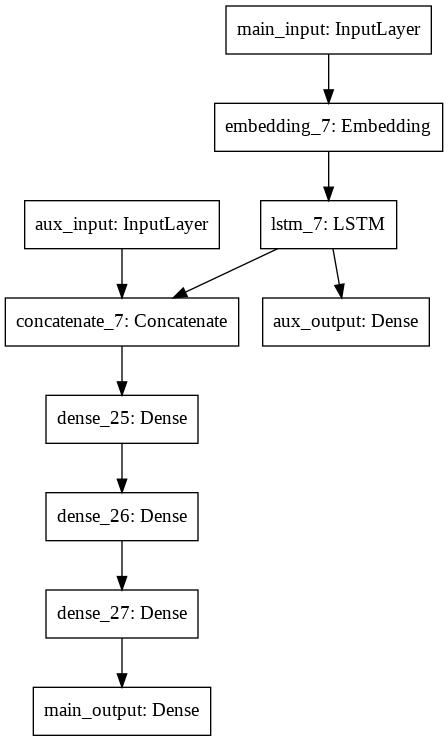

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
https://qiita.com/kotai2003/items/7dd746d7e4118b7a44de

In [ ]:
https://keras.io/ja/getting-started/functional-api-guide/

In [ ]:
https://keras.io/ja/visualization/

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              loss_weights=[1., 0.2])

In [ ]:
model.fit([x_train, x_test], [y_train, y_test],epochs=50, batch_size=32)

Epoch 1/50


InvalidArgumentError: ignored

In [ ]:
model.compile(optimizer='rmsprop',
              loss={'main_output': 'binary_crossentropy', 'aux_output': 'binary_crossentropy'},
              loss_weights={'main_output': 1., 'aux_output': 0.2})

# And trained it via:
model.fit({'main_input': headline_data, 'aux_input': additional_data},
          {'main_output': labels, 'aux_output': labels},
          epochs=50, batch_size=32)

In [ ]:
#共有ﾚｲﾔ
同じエンコード方法を使いたい場合にこれを使う

入力1も入力2も同じ入力者であり、それを判定したい場合
どちらの入力も同じエンコーダで処理してやればいい

そのエンコーダの共有が共有レイヤによって実現する

In [ ]:
import keras
from keras.layers import Input, LSTM, Dense
from keras.models import Model

tweet_a = Input(shape=(280, 256))
tweet_b = Input(shape=(280, 256))

In [ ]:

shared_lstm = LSTM(64)

encoded_a = shared_lstm(tweet_a)
encoded_b = shared_lstm(tweet_b)

merged_vector = keras.layers.concatenate([encoded_a, encoded_b], axis=-1)

predictions = Dense(1, activation='sigmoid')(merged_vector)

model = Model(inputs=[tweet_a, tweet_b], outputs=predictions)

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit([data_a, data_b], labels, epochs=10)

NameError: ignored

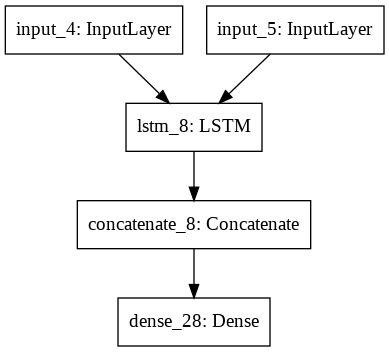

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
おなじレイヤで同じ入力を学習することで、エンコーダ自体は両方の入力から最適なエンコードを学習することが出来る

違う入力はどうすんねん？
分別器に違う入力であることを伝えられるだけの特徴量の抽出をしてくれるのか？